<a href="https://colab.research.google.com/github/erickwb/neural_network_py/blob/main/MNIST_numbers_0_5/MNIST_recognition_0_and_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Erick Correia Silva 

21/09/2021

In [120]:
#imports 
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist   
from tensorflow.keras import layers, optimizers, datasets
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt


Carregando o Dataset MNIST da bibliotea keras

In [121]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [122]:
#mascara para pegar apenas os digitos 0 e 5
train = np.where((y_train == 0 ) | (y_train == 5))
test = np.where((y_test == 0) | (y_test == 5))

In [123]:
#amostras separadas em treino e teste dos digitos 0 e 5
X_train, y_train = X_train[train], y_train[train]
X_test, y_test = X_test[test], y_test[test]

In [124]:
#visualizando o formato dos dados
print(y_train[0])
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

5
(11344, 28, 28) (11344,)
(1872, 28, 28) (1872,)


###  Tratando os Dados Categóricos

In [125]:
#conversão de labels (rótulos) em one-hot vectors (one-hot codes).
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


### Visualizando Imagens do Dataset

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


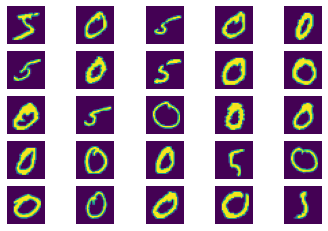

In [126]:
#Desenhando as 25 primeiras imagens do conjunto de treinamento.
plt.figure()
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])
    plt.ylabel(y_train[i])
    plt.axis('off')
plt.show()

### Pré-Processamento dos Dados


In [127]:
#conversão simples
x_train = X_train.reshape(11344, 784)
x_test = X_test.reshape(1872, 784)

In [128]:
#ajusta a faixa dinâmica de valores
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0


### Construindo e Treinando uma DNN


In [129]:
#modelo DNN:
# 3 camadas totalmente conectadas e ativações ReLU.
# a saída usa softmax para favorecer a classificação baseada em one-hot vector
model = keras.Sequential([ 
    layers.Dense(512, activation='relu', input_dim = 784),    
    layers.Dense(256, activation='relu'),
    layers.Dense(124, activation='relu'),
    layers.Dense(num_classes, activation='softmax')])

#visualiza o modelo: 512
print( model.input_shape )
print( model.summary() )

(None, 784)
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_33 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_34 (Dense)             (None, 124)               31868     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1250      
Total params: 566,366
Trainable params: 566,366
Non-trainable params: 0
_________________________________________________________________
None


#### Configurando a Aprendizagem da DNN

In [130]:
# Adam com learning rate = 0.001
Optimizer = optimizers.Adam(0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Optimizer,
              metrics=['accuracy'])

####  Treinando o Modelo DNN

In [131]:
# verificando uso da GPU
print( tf.config.list_physical_devices('GPU') )
print()

#treinamento é realizado usando:
#10 épocas, divididas em batches grandes (128 amostras cada)
model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose = 1)

[]

Epoch 1/10
89/89 [==============================] - 1s 12ms/step - loss: 0.1234 - accuracy: 0.9572
Epoch 2/10
89/89 [==============================] - 1s 12ms/step - loss: 0.0176 - accuracy: 0.9936
Epoch 3/10
89/89 [==============================] - 1s 12ms/step - loss: 0.0049 - accuracy: 0.9980
Epoch 4/10
89/89 [==============================] - 1s 12ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 5/10
89/89 [==============================] - 1s 12ms/step - loss: 0.0014 - accuracy: 0.9996
Epoch 6/10
89/89 [==============================] - 1s 12ms/step - loss: 0.0047 - accuracy: 0.9988
Epoch 7/10
89/89 [==============================] - 1s 12ms/step - loss: 0.0046 - accuracy: 0.9984
Epoch 8/10
89/89 [==============================] - 1s 12ms/step - loss: 4.8467e-04 - accuracy: 0.9999
Epoch 9/10
89/89 [==============================] - 1s 12ms/step - loss: 9.7215e-05 - accuracy: 1.0000
Epoch 10/10
89/89 [==============================] - 1s 12ms/step - loss: 3.3630e-05 - accuracy: 

##Avaliando o Modelo DNN
O desempenho do modelo é avaliado em termos de loss e de acurácia, sendo que essa métrica foi fornecida durante a etapa de configuração.

In [132]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.011898478493094444
Test accuracy: 0.997863233089447


### Salvando o Modelo DNN Treinado

In [133]:
try:
    os.makedirs('mnist_model')
    print('creating \'./mnist_model/\'')
except FileExistsError as e:
    print('\'./mnist_model/\' already exists')

model.save('./mnist_model/final_DNN_model.h5')

'./mnist_model/' already exists


###Construindo e Treinando uma CNN

In [134]:
#modelo de camadas sequenciais
model = keras.Sequential()
#primeira convolução com kernel 5x5 + pooling 2x2
model.add(keras.layers.Conv2D(filters=32,kernel_size = 5,strides = (1,1),
                              padding = 'same',activation = tf.nn.relu,input_shape = (28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

#segunda convolução com kernel 3x3 + pooling 2x2
model.add(keras.layers.Conv2D(filters=64,kernel_size = 3,strides = (1,1),padding = 'same',activation = tf.nn.relu))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

#dropout com fator de 25% + conversão em vetor (flatten)
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())

# duas camadas densas com dropout de 50% entre elas
#a segunda camada usa softmax
model.add(keras.layers.Dense(units=128,activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=10,activation = tf.nn.softmax))

#exibe o resultado
print( model.summary() )

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)             

#### Treinando o Modelo CNN


In [135]:
# verificaçao de uso da GPU
print(tf.config.list_physical_devices('GPU'))
print()


X_train = x_train.reshape(11344,28,28,1)
X_test = x_test.reshape(1872,28,28,1)

#reutilizando Adam e os outros parâmetros adotados na DNN
model.compile( optimizer=keras.optimizers.Adam(0.001),
               loss="categorical_crossentropy",
               metrics=['accuracy']) 

#treinamento: 5 épocas 
model.fit(x=X_train,y=y_train,epochs=10,batch_size=128) 

[]

Epoch 1/10
89/89 [==============================] - 15s 159ms/step - loss: 0.1953 - accuracy: 0.9358
Epoch 2/10
89/89 [==============================] - 14s 158ms/step - loss: 0.0179 - accuracy: 0.9951
Epoch 3/10
89/89 [==============================] - 14s 158ms/step - loss: 0.0101 - accuracy: 0.9970
Epoch 4/10
89/89 [==============================] - 14s 158ms/step - loss: 0.0067 - accuracy: 0.9982
Epoch 5/10
89/89 [==============================] - 14s 158ms/step - loss: 0.0056 - accuracy: 0.9984
Epoch 6/10
89/89 [==============================] - 14s 158ms/step - loss: 0.0045 - accuracy: 0.9985
Epoch 7/10
89/89 [==============================] - 14s 158ms/step - loss: 0.0046 - accuracy: 0.9987
Epoch 8/10
89/89 [==============================] - 14s 159ms/step - loss: 0.0030 - accuracy: 0.9989
Epoch 9/10
89/89 [==============================] - 14s 157ms/step - loss: 0.0025 - accuracy: 0.9990
Epoch 10/10
89/89 [==============================] - 14s 157ms/step - loss: 0.0018 - ac

####  Avaliando o Modelo CNN

In [136]:
test_loss,test_acc  = model.evaluate(x=X_test,y=y_test)

print("\nAcurácia de Teste: %.4f"%test_acc)

59/59 [==============================] - 1s 13ms/step - loss: 0.0011 - accuracy: 0.9995

Acurácia de Teste: 0.9995


###Salvando o Modelo CNN


In [137]:
model.save('./mnist_model/final_CNN_model.h5')

####  Inferência e Visualização de Resultados

In [138]:
#apenas 1 linha para recuperar o modelo: recria a estrutura e povoa os pesos
new_model = load_model('./mnist_model/final_CNN_model.h5')

predições para as primeiras 50 imagens de teste:
0,5,0,0,5,	
5,0,0,5,5,	
5,0,5,0,0,	
0,5,5,0,5,	
5,5,0,0,5,	
5,5,0,5,5,	
5,5,0,5,0,	
0,0,5,5,0,	
5,5,5,0,5,	
5,0,0,5,5,	
primeiras 50 imagens de teste:


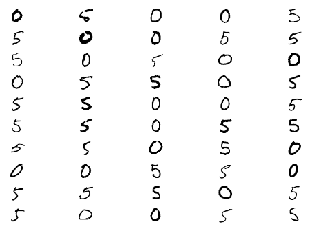

In [139]:
# visualizando N imagens
%matplotlib inline
def res_Visual(n):
    # efetuando as predições:
    final_opt_a = np.argmax(new_model.predict(X_test[0:n]), axis=-1)    
    fig, ax = plt.subplots(nrows=int(n/5),ncols=5 )
    ax = ax.flatten()
    print('predições para as primeiras {} imagens de teste:'.format(n))
    for i in range(n):
        print(final_opt_a[i],end=',')
        if int((i+1)%5) == 0:
            print('\t')
        #Visualize image display.
        img = X_test[i].reshape((28,28))#Lendo cada linha de dados no formato de Ndarry.
        plt.axis("off") #
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')#Visualizacao
        ax[i].axis("off")
    print('primeiras {} imagens de teste:'.format(n))


res_Visual(50)